# Awari - Data Science
## Dados utilizados - 2017, 2018 e 2019

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [65]:
dados = pd.read_csv('data.csv', index_col=0)

In [66]:
dados.estado_fisico.value_counts(normalize=True)

Ileso            0.476807
Lesões Leves     0.368852
Lesões Graves    0.113521
Óbito            0.040820
Name: estado_fisico, dtype: float64

In [67]:
# transformando estado_fisico em binário (0 = Ileso e Leves, 1 = Graves e Obito)
dados['alto_risco'] = dados.estado_fisico.apply(lambda x: 1 if x in ['Lesões Graves', 'Óbito'] else 0)
dados.alto_risco.value_counts(normalize=True)

0    0.84566
1    0.15434
Name: alto_risco, dtype: float64

In [68]:
# definindo o Y
y = dados['alto_risco']

In [69]:
# definindo o X
X_cols = ['br', 'km', 'fase_dia', 'dia_semana', 'condicao_metereologica']
X = dados[X_cols]

In [70]:
# utilizando as BR com mais de 1000 acidentes
filtro_br = X.br.value_counts()>999 
br_filtradas = filtro_br[filtro_br]
X = X[X.br.isin(br_filtradas.index)]

In [71]:
# transformando a BR em string
X['br']=X.br.astype(int)
X['br']=X.br.astype(str)

In [72]:
# aplicando GET_DUMMIES no X
cat_cols = ['br', 'fase_dia', 'dia_semana', 'condicao_metereologica']
X_pronto = pd.get_dummies(X[cat_cols])

In [73]:
# definindo o y (binário do estado_fisico)
y = y[X_pronto.index]

# Iniciando Machine Learning

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pronto, y, random_state=42, test_size=0.30)

## Regressão Logística

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()

In [14]:
lr.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_train.mean()

0.15285079928952042

In [16]:
y_preds = lr.predict(X_test)

In [17]:
# ele tem alto indice de acerto mesmo prevendo todos como ileso
np.mean(y_preds==y_test.values)

0.8474182197963421

In [18]:
from sklearn.metrics import roc_auc_score

In [19]:
y_preds=lr.predict_proba(X_test)

In [20]:
y_preds=y_preds[:, 1]

In [21]:
roc_lr = roc_auc_score(y_test.values, y_preds)
print(roc_lr)

0.5874217340311062


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
y_preds = lr.predict(X_test)

In [24]:
cm_lr = confusion_matrix(y_test.values, y_preds)

Text(33.0, 0.5, 'Correto')

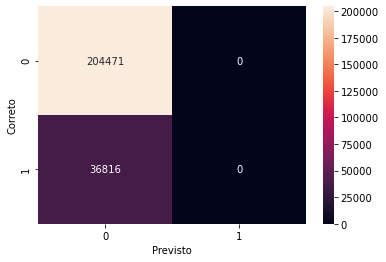

In [25]:
sns.heatmap(cm_lr, annot=True, fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Correto')

## Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier()

In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_preds=rf.predict_proba(X_test)

In [30]:
y_preds=y_preds[:, 1]

In [31]:
roc_rf = roc_auc_score(y_test.values, y_preds)
print(roc_rf)

0.6407211841883346


In [32]:
y_preds=rf.predict(X_test)

Text(33.0, 0.5, 'Correto')

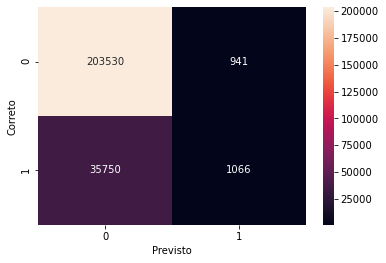

In [33]:
cm_rf = confusion_matrix(y_test.values, y_preds)
sns.heatmap(cm_rf, annot=True, fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Correto')

## KNN - KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_preds=knn.predict_proba(X_test)
y_preds=y_preds[:, 1]
roc_knn = roc_auc_score(y_test.values, y_preds)
print(roc_knn)

0.5699833299306943


In [38]:
y_preds=knn.predict(X_test)
cm_knn = confusion_matrix(y_test.values, y_preds)

Text(33.0, 0.5, 'Correto')

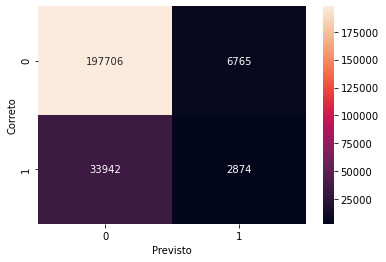

In [39]:
sns.heatmap(cm_knn, annot=True, fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Correto')

## Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtc = DecisionTreeClassifier()

In [42]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_preds=dtc.predict_proba(X_test)
y_preds=y_preds[:, 1]
roc_dtc = roc_auc_score(y_test.values, y_preds)
print(roc_dtc)

0.6402358064026068


In [44]:
y_preds=dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test.values, y_preds)

Text(33.0, 0.5, 'Correto')

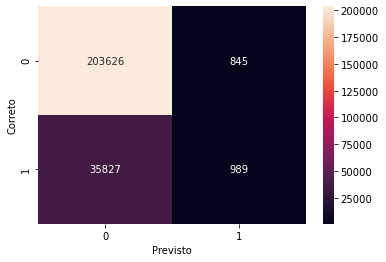

In [45]:
sns.heatmap(cm_dtc, annot=True, fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Correto')

## Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gb = GradientBoostingClassifier()

In [48]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [49]:
y_preds=gb.predict_proba(X_test)
y_preds=y_preds[:, 1]
roc_gb = roc_auc_score(y_test.values, y_preds)
print(roc_gb)

0.5896048826314765


In [50]:
y_preds=gb.predict(X_test)
cm_gb = confusion_matrix(y_test.values, y_preds)

Text(33.0, 0.5, 'Correto')

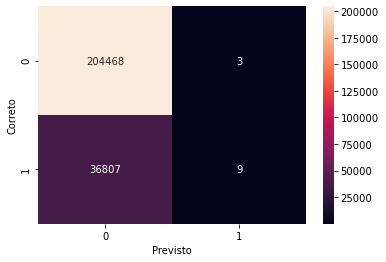

In [51]:
sns.heatmap(cm_gb, annot=True, fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Correto')

## CALIBRANDO RANDOM FOREST

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()

In [54]:
parameters = { 
    'n_estimators': [50, 100, 200],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None,4,8],
}

In [55]:
clf_grid = GridSearchCV(rf, parameters, scoring='roc_auc', n_jobs=-1, cv=3)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 8],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [56]:
clf_grid.best_params_

{'max_depth': None, 'n_estimators': 200}

In [57]:
rf_calibrado = clf_grid.best_estimator_

In [58]:
y_preds=rf_calibrado.predict_proba(X_test)
y_preds=y_preds[:, 1]
roc_rf_calib = roc_auc_score(y_test.values, y_preds)
print(roc_rf_calib)

0.640776404539641


In [59]:
rf_calibrado.feature_importances_

array([7.63971933e-03, 1.74150213e-02, 6.94592439e-03, 6.92011230e-03,
       1.57927860e-02, 9.83980644e-03, 5.73174684e-03, 9.40902783e-03,
       1.03110344e-02, 1.01954847e-02, 8.44387655e-03, 8.58788623e-03,
       3.57739123e-03, 1.14987768e-02, 9.44444135e-03, 1.03604478e-02,
       8.24452916e-03, 5.74663911e-03, 9.01743035e-03, 8.18344295e-03,
       1.01506255e-02, 9.38425434e-03, 9.68034202e-03, 6.62546718e-03,
       9.43288105e-03, 5.42404721e-03, 4.99824049e-03, 8.34740666e-03,
       4.42398186e-03, 6.05988457e-03, 1.29027943e-02, 4.08515606e-03,
       7.11550250e-03, 6.27399948e-03, 4.08684915e-03, 4.30482700e-03,
       8.48398162e-03, 1.02850010e-02, 3.48642817e-03, 9.34203505e-03,
       6.05538613e-03, 8.93350281e-03, 1.23949875e-02, 7.51177362e-03,
       5.81447174e-03, 5.01297004e-03, 9.72001519e-03, 8.77807128e-03,
       5.46335450e-03, 4.29495672e-03, 4.29559063e-03, 8.47184387e-03,
       6.02059314e-03, 3.57710700e-03, 3.91111472e-03, 6.13830214e-03,
      

## SALVANDO O MODELO DE MACHINE LEARNING

In [60]:
import pickle

In [61]:
with open('acidentes_estimador.pkl', 'wb') as f:   #salvar
    pickle.dump(rf_calibrado, f)

In [62]:
# #carregando o estimador
# with open('acidentes_estimador.pkl', 'rb') as f:
#     clf = pickle.load(f)

## GRAFICO COM RESULTADOS

In [78]:
print(roc_lr, roc_rf, roc_knn, roc_dtc, roc_gb)

0.5874217340311062 0.6407211841883346 0.5699833299306943 0.6402358064026068 0.5896048826314765


In [90]:
resultado = {
    "Regressão Logistica": (roc_lr *100),
    "Random Forest": (roc_rf *100),
    "KNN": (roc_knn *100),
    "Decision Tree": (roc_dtc *100),
    "Gradient Boosting": (roc_gb *100)
}

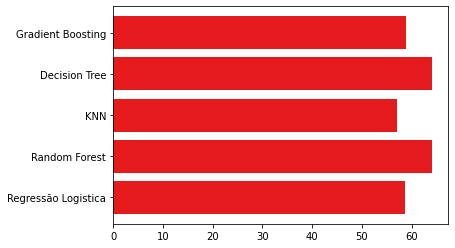

In [100]:
import matplotlib.pyplot as plt
sns.set_palette("Set1")

plt.barh(*zip(*resultado.items()))
plt.show()

In [89]:
resultado

{'Regressão Logistica': 58.74217340311062,
 'Random Forest': 0.6407211841883346,
 'KNN': 0.5699833299306943,
 'Decision Tree': 0.6402358064026068,
 'Gradient Boosting': 0.5896048826314765}